##### CNN 실습

In [98]:
# mnist data 가져오기

from tensorflow.keras.datasets import mnist

(Xm_train, ym_train), (Xm_test, ym_test) = mnist.load_data()
Xm_train, Xm_test = Xm_train / 255.0, Xm_test / 255.0

In [62]:
# mnist DNN - Sequential 만들기

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model_DNN = Sequential()
model_DNN.add(Flatten(input_shape=(28,28)))    #input
model_DNN.add(Dense(128, activation='relu'))   #1
model_DNN.add(Dense(10, activation='softmax')) #output

model_DNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
model_DNN.fit(X_train, y_train, epochs=10, verbose=0)

In [108]:
# model_DNN 확인

model=model_DNN

(test_loss, test_acc) = model.evaluate(X_test,y_test)
print('{:.2f}%\n'.format(100*test_acc))

print(model.predict(X_test[0].reshape(1,28,28)))

model.layers

313/313 [==============================] - 0s 915us/step - loss: 0.0838 - acc: 0.9781
97.81%

[[2.1562900e-10 1.4293804e-10 3.8588951e-07 1.5534673e-06 1.6031752e-12
  2.0845813e-10 6.5519289e-17 9.9999595e-01 1.3791909e-07 1.9725489e-06]]


6

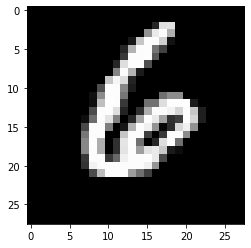

In [99]:
# 이미지 샘플 확인

import matplotlib.pyplot as plt

i=13
X=Xm_train[i]
y=ym_train[i]

plt.figure()
plt.imshow(X, cmap='gray')
y

In [31]:
# mnist CNN 만들기 (filter개수, filter크기, padding, stride)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D

model_lenet = Sequential()

#1st layer : [Conv]+[ReLU]+[Pool]
model_lenet.add(Conv2D(input_shape=(28,28,1),   # 28*28(사이즈)*1(채널-흑백:1,RGB:3)
                      kernel_size=(3,3),        # filter 크기
                      filters=32,
                      strides=(1,1),
                      padding='same',
                      activation='relu'))
model_lenet.add(MaxPool2D(pool_size=(2,2),
                         strides=(2,2),
                         padding='valid'))

#2nd layer : [Conv]+[ReLU]+[Pool]
model_lenet.add(Conv2D(kernel_size=(5,5),        # filter 크기
                      filters=48,
                      strides=(1,1),
                      padding='same',
                      activation='relu'))
model_lenet.add(MaxPool2D(pool_size=(2,2),
                         strides=(2,2),
                         padding='valid'))

#3rd layer
model_lenet.add(Flatten())                         # input_shape 은 처음에만 
model_lenet.add(Dense(256, activation='relu'))

#4th layer
model_lenet.add(Dense(128, activation='relu'))

#output
model_lenet.add(Dense(10, activation='softmax'))

model_lenet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
model_lenet.fit(X_train.reshape(-1,28,28,1), y_train, epochs=10, verbose=0)

In [80]:
# model_lenet 확인

model=model_lenet

(test_loss, test_acc) = model.evaluate(X_test.reshape(-1,28,28,1),y_test)
print('{:.2f}%\n'.format(100*test_acc))

print(model.predict(X_test[0].reshape(1,28,28,1)))

model.layers

ValueError: cannot reshape array of size 30720000 into shape (28,28,1)

In [74]:
# CIFAR10 data 가져오기

from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

170500096/170498071 [==============================] - 733s 4us/step


In [75]:
# CIFAR10 alexnet 만들기

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D

model_alex = Sequential()

#1st layer : [Conv]+[ReLU]+[Pool]
model_alex.add(Conv2D(input_shape=(32,32,3),   # 모르겠으면 X_train.shape 해서 그대로
                      kernel_size=(3,3),        # filter 크기
                      filters=48,
                      strides=(1,1),
                      padding='same',
                      activation='relu'))
model_alex.add(MaxPool2D(pool_size=(2,2),
                         strides=(2,2),
                         padding='valid'))

#2nd layer : [Conv]+[ReLU]+[Pool]
model_alex.add(Conv2D(kernel_size=(3,3),
                      filters=96,
                      strides=(1,1),
                      padding='same',
                      activation='relu'))
model_alex.add(MaxPool2D(pool_size=(2,2),
                         strides=(2,2),
                         padding='valid'))

#3rd layer
model_alex.add(Conv2D(kernel_size=(3,3),
                      filters=192,
                      strides=(1,1),
                      padding='same',
                      activation='relu'))

#4th layer
model_alex.add(Conv2D(kernel_size=(3,3),
                      filters=192,
                      strides=(1,1),
                      padding='same',
                      activation='relu'))

#5th layer : [Conv]+[ReLU]+[Pool]
model_alex.add(Conv2D(kernel_size=(3,3),
                      filters=256,
                      strides=(1,1),
                      padding='same',
                      activation='relu'))
model_alex.add(MaxPool2D(pool_size=(2,2),
                         strides=(2,2),
                         padding='valid'))

#6th layer
model_alex.add(Flatten())                         # input_shape 은 처음에만 
model_alex.add(Dense(512, activation='relu'))

#7th layer
model_alex.add(Dense(256, activation='relu'))

#output
model_alex.add(Dense(10, activation='softmax'))

model_alex.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
model_alex.fit(X_train.reshape(-1,32,32,3), y_train, epochs=5, verbose=0)

In [97]:
# model_alex 확인

model=model_alex

(test_loss, test_acc) = model.evaluate(X_test.reshape(-1,32,32,3),y_test)
print('{:.2f}%\n'.format(100*test_acc))

print(model.predict(X_test[0].reshape(1,32,32,3)))

model.layers

313/313 [==============================] - 6s 20ms/step - loss: 0.8142 - acc: 0.7254
72.54%

[[0.00171434 0.00266545 0.00498872 0.512295   0.00139883 0.45029518
  0.00499675 0.00557925 0.00668131 0.00938508]]


In [111]:
# mnist DNN -model 만들기

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Input

inputs = Input(shape=(28,28))
flatten = Flatten()(inputs)
hidden1 = Dense(128, activation='relu')(flatten)   #1
hidden2 = Dense(256, activation='relu')(hidden1)   #2
hidden3 = Dense(128, activation='relu')(hidden2)   #3
outputs = Dense(10, activation='softmax')(hidden3) #output
model_NN = Model(inputs=inputs,outputs=outputs)

model_NN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
model_NN.fit(Xm_train, ym_train, epochs=10, verbose=0)

In [112]:
# model_NN 확인

model=model_NN

(test_loss, test_acc) = model.evaluate(Xm_test,ym_test)
print('{:.2f}%\n'.format(100*test_acc))

print(model.predict(Xm_test[0].reshape(1,28,28)))

model.layers

313/313 [==============================] - 0s 676us/step - loss: 0.0814 - acc: 0.9799
97.99%

[[6.19717439e-13 6.02397021e-09 1.48855435e-08 2.13779480e-11
  8.33181790e-09 4.98888582e-13 3.23157959e-19 9.99999523e-01
  2.87261603e-11 4.71141163e-07]]
